In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [4]:
df_outcomes_details=pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='Outcomes')
df_donor_details=pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='DonorDetails')
df_referral_details=pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='ReferralDetails')
DataD_df=pd.read_excel('DataDictionary.xlsx')


1.Using numpy functions, multiply the following arrays using matrix multiplication.


In [5]:
#1.Using numpy functions, multiply the following arrays using matrix multiplication.
 #a=np.arange(4).reshape(2,2)
# b=np.arange(6).reshape(3,2)

a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2)
b_trps=np.transpose(b)
print(a)
print(b_trps)
c=a @ b_trps
print(c)

[[0 1]
 [2 3]]
[[0 2 4]
 [1 3 5]]
[[ 1  3  5]
 [ 3 13 23]]


2.On Average, what is the time that passes between approach and procurement?

In [6]:
#2.On Average, what is the time that passes between approach and procurement?

#From Referral details table removing empty rows of time approached and procured
df_clean=df_referral_details.dropna(subset=['time_approached','time_procured'])

df_clean['time_approached']=pd.to_datetime(df_clean['time_approached'])
#df_clean['year']=df_clean['time_approached'].dt.year

df_clean['time_procured']=pd.to_datetime(df_clean['time_procured'])
#df_clean['year']=df_clean['time_referred'].dt.year

df_clean['difference']=(df_clean['time_procured']-df_clean['time_approached']).dt.days
avg=df_clean['difference'].mean()
print(df_clean)
print(avg)


           PatientID  Approached Relatives  Authorized By Family  \
25      OPO1_P648384                     1                     1   
49      OPO1_P404478                     1                     1   
65      OPO1_P340806                     1                     1   
70      OPO1_P278912                     1                     1   
92      OPO1_P160928                     1                     1   
...              ...                   ...                   ...   
133010  OPO6_P925470                     1                     1   
133023  OPO6_P273753                     1                     1   
133026  OPO6_P751972                     1                     1   
133081  OPO6_P667026                     1                     1   
133090  OPO6_P721333                     1                     1   

        Cross_Clamped  transplanted  Tissue_Referral  Eye_Referral  \
25                  1             1                1             1   
49                  1             1        

C:\Users\kbaks\AppData\Local\Temp\ipykernel_50728\313099983.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['time_approached']=pd.to_datetime(df_clean['time_approached'])
C:\Users\kbaks\AppData\Local\Temp\ipykernel_50728\313099983.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['time_procured']=pd.to_datetime(df_clean['time_procured'])
C:\Users\kbaks\AppData\Local\Temp\ipykernel_50728\313099983.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

4.Who is the oldest patient who died of drug overdose?

In [8]:
#4.Who is the oldest patient who died of drug overdose?

#From Donor details table taking lists
patient_donor=df_donor_details['PatientID']
age_donor=df_donor_details['age']
causeofdeath_donor=df_donor_details['causeofdeath']
mechanism_death_donor=df_donor_details['mechanism_of_death']
died_donor={
    "patien_ID":patient_donor,
    "age_donor":age_donor,
    "cd_donor":causeofdeath_donor
}
data_donor=pd.DataFrame(died_donor)
#data_donor_diet=data_donor[(data_donor['cd_donor']=="Overdose") | (data_donor['md_donor']=="Overdose")]
data_donor_overdose=data_donor[(data_donor['cd_donor']=="Overdose")]
data_donor_oldPatient=data_donor_overdose.loc[data_donor_overdose['age_donor'].idxmax()]
data_donor_oldPatient

patien_ID    OPO4_P442864
age_donor            80.0
cd_donor         Overdose
Name: 68688, dtype: object

5.What is the average age of patients with renal failure?

In [9]:
#5.What is the average age of patients with renal failure?

#df_outcomes_details
#Merged two tables of donor_details and outcomes_details
merged_df=pd.merge(df_donor_details,df_outcomes_details,on='PatientID',how='left')
merged_df
renal_failure_List=merged_df[(merged_df['outcome_kidney_left']=="Transplanted") | (merged_df['outcome_kidney_right']=="Transplanted")]
renal_failure_List
renal_failure_List.groupby(['PatientID'])['age'].mean()




PatientID
OPO1_P100082    23.0
OPO1_P100320    10.0
OPO1_P100538    19.0
OPO1_P101409    13.0
OPO1_P101470    24.0
                ... 
OPO6_P991622    47.0
OPO6_P992125    31.0
OPO6_P994456    44.0
OPO6_P996619    62.0
OPO6_P997730    35.0
Name: age, Length: 7476, dtype: float64

6.List all male donors over 75 who had organs recovered for research

In [10]:
#6.List all male donors over 75 who had organs recovered for research

##Merged two tables of donor_details and outcomes_details
merged_df=pd.merge(df_donor_details,df_outcomes_details,on='PatientID',how='left')
merged_df_recovered=merged_df[((merged_df['outcome_heart']== "Recovered for Research") | (merged_df['outcome_liver']== "Recovered for Research") | (merged_df['outcome_kidney_left']== "Recovered for Research") | (merged_df['outcome_kidney_right']== "Recovered for Research") | (merged_df['outcome_lung_left']== "Recovered for Research") | (merged_df['outcome_lung_right']== "Recovered for Research") | (merged_df['outcome_intestine']== "Recovered for Research") | (merged_df['outcome_pancreas']== "Recovered for Research") )]
merged_df_recovered_patients=merged_df_recovered[(merged_df_recovered['age']>75) & (merged_df_recovered['gender']=="M")]
merged_df_recovered_patients

PatientID   age gender      race              causeofdeath  \
13815  OPO1_P463597  76.0      M  Hispanic  cerebrovascular accident   
35962  OPO3_P862019  83.0      M     White                    Anoxia   
45616  OPO4_P199498  77.0      M     White  cerebrovascular accident   
47887  OPO4_P877754  77.0      M     White  cerebrovascular accident   
50813   OPO4_P92279  76.0      M  Hispanic               Head Trauma   
51321  OPO4_P628770  77.0      M     White  cerebrovascular accident   
52429  OPO4_P908004  76.0      M     White  cerebrovascular accident   
60562  OPO4_P435716  78.0      M  Hispanic                    Anoxia   
64894  OPO4_P487002  79.0      M     White  cerebrovascular accident   
81716  OPO5_P287897  79.0      M     Black               Head Trauma   
85013  OPO5_P463195  78.0      M     White               Head Trauma   
88522  OPO5_P223804  78.0      M     Black                    Stroke   

      mechanism_of_death  brain_death       time_asystole    time_brain_death  \
13815             Stroke            1                 NaT 2033-07-11 12:29:00   
35962     Cardiovascular            1                 NaT 2035-12-10 17:50:00   
45616             Stroke            1                 NaT 2030-06-16 07:50:00   
47887             Stroke            1                 NaT 2030-11-19 13:50:00   
50813       Blunt Injury            1                 NaT 2031-10-25 11:27:00   
51321             Stroke            1                 NaT 2031-02-14 11:20:00   
52429             Stroke            1                 NaT 2033-01-16 13:50:00   
60562     Cardiovascular            1                 NaT 2032-11-14 16:03:00   
64894             Stroke            1                 NaT 2034-02-27 11:41:00   
81716       Blunt Injury            1 2032-09-15 12:56:00 2032-09-14 20:34:00   
85013             Stroke            1 2032-01-30 10:36:00 2032-01-29 16:17:00   
88522             Stroke            1 2034-04-08 05:19:00 2034-04-06 14:11:00   

                outcome_heart           outcome_liver     outcome_kidney_left  \
13815                     NaN            Transplanted                     NaN   
35962                     NaN            Transplanted            Transplanted   
45616                     NaN            Transplanted  Recovered for Research   
47887                     NaN            Transplanted  Recovered for Research   
50813                     NaN  Recovered for Research  Recovered for Research   
51321                     NaN            Transplanted  Recovered for Research   
52429  Recovered for Research            Transplanted                     NaN   
60562                     NaN            Transplanted                     NaN   
64894                     NaN            Transplanted  Recovered for Research   
81716  Recovered for Research            Transplanted                     NaN   
85013                     NaN  Recovered for Research                     NaN   
88522  Recovered for Research            Transplanted  Recovered for Research   

         outcome_kidney_right       outcome_lung_left      outcome_lung_right  \
13815                     NaN                     NaN  Recovered for Research   
35962            Transplanted  Recovered for Research  Recovered for Research   
45616  Recovered for Research  Recovered for Research                     NaN   
47887                     NaN  Recovered for Research  Recovered for Research   
50813  Recovered for Research                     NaN                     NaN   
51321  Recovered for Research  Recovered for Research  Recovered for Research   
52429                     NaN  Recovered for Research  Recovered for Research   
60562                     NaN  Recovered for Research  Recovered for Research   
64894  Recovered for Research  Recovered for Research  Recovered for Research   
81716                     NaN                     NaN                     NaN   
85013                     NaN                     NaN                     

7.Make Patient ID as index to the table.

In [11]:
#7.Make Patient ID as index to the table.

#Creating sub dataframe 
subdf_donor_details=df_donor_details['PatientID']
column_name=['age','gender','race','causeofdeath','mechanism_of_death','brain_death','time_asystole','time_brain_death']
subdf_donor_details
s1=pd.DataFrame(data=df_donor_details,index=subdf_donor_details,columns=column_name)
s1

age gender race causeofdeath mechanism_of_death  brain_death  \
PatientID                                                                    
OPO1_P155959  NaN    NaN  NaN          NaN                NaN          NaN   
OPO1_P297347  NaN    NaN  NaN          NaN                NaN          NaN   
OPO1_P399316  NaN    NaN  NaN          NaN                NaN          NaN   
OPO1_P246407  NaN    NaN  NaN          NaN                NaN          NaN   
OPO1_P187209  NaN    NaN  NaN          NaN                NaN          NaN   
...           ...    ...  ...          ...                ...          ...   
OPO6_P54946   NaN    NaN  NaN          NaN                NaN          NaN   
OPO6_P630991  NaN    NaN  NaN          NaN                NaN          NaN   
OPO6_P8748    NaN    NaN  NaN          NaN                NaN          NaN   
OPO6_P5461    NaN    NaN  NaN          NaN                NaN          NaN   
OPO6_P942291  NaN    NaN  NaN          NaN                NaN          NaN   

             time_asystole time_brain_death  
PatientID                                    
OPO1_P155959           NaT              NaT  
OPO1_P297347           NaT              NaT  
OPO1_P399316           NaT              NaT  
OPO1_P246407           NaT              NaT  
OPO1_P187209           NaT              NaT  
...                    ...              ...  
OPO6_P54946            NaT              NaT  
OPO6_P630991           NaT              NaT  
OPO6_P8748             NaT              NaT  
OPO6_P5461             NaT              NaT  
OPO6_P942291           NaT              NaT  

[133101 rows x 8 columns]

8.Create a dictionary with the Age and Cause of Death for any 5 random donors.
 Access any one cause of death using the donors age using the get() function

In [12]:
#8.Create a dictionary with the Age and Cause of Death for any 5 random donors.
 #Access any one cause of death using the donors age using the get() function

dic={
    "PatientID":['OPO1_P155959','OPO1_P297347','OPO1_P399316','OPO1_P246407','OPO1_P187209'],
    "age":[54,78,57,78,70],
    "causeofdeath":['Unknown','Unknown','Anoxia','cerebrovascular accident','Unknown']
}
print(dic)


{'PatientID': ['OPO1_P155959', 'OPO1_P297347', 'OPO1_P399316', 'OPO1_P246407', 'OPO1_P187209'], 'age': [54, 78, 57, 78, 70], 'causeofdeath': ['Unknown', 'Unknown', 'Anoxia', 'cerebrovascular accident', 'Unknown']}


In [13]:
#8.Access any one cause of death using the donors age using the get() function
#Frome above dictionary
age=dic['age']
causeofdeath=dic['causeofdeath']
data=dict(zip(age,causeofdeath))
#data
print(data.get(78))

cerebrovascular accident


9.Create a heatmap on the donor details table.


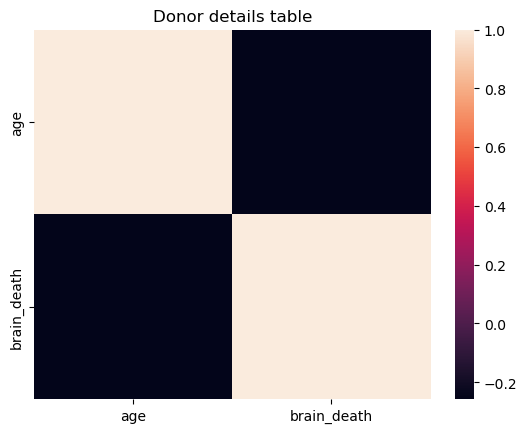

In [14]:
#9.Create a heatmap on the donor details table.
df_donor_details

#heatmap works for numerical values.should avoid the string datatype columns for heatmap
#if we include those will get this error(ValueError: could not convert string to float: 'OPO1_P155959')

numerical_columns = df_donor_details.select_dtypes(include=['number']).columns
correlation_matrix = df_donor_details[numerical_columns].corr()
hm=sns.heatmap(data=correlation_matrix)
plt.title('Donor details table')

plt.show()

10.Create a bar chart showing the number of donors by procured year. 
Add hatching to the bars using the set_hatch() method, and exclude any outlier years.

C:\Users\kbaks\AppData\Local\Temp\ipykernel_50728\3528085672.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_don_ref_df_cleaned['Year'] = merged_don_ref_df_cleaned['time_procured'].dt.year


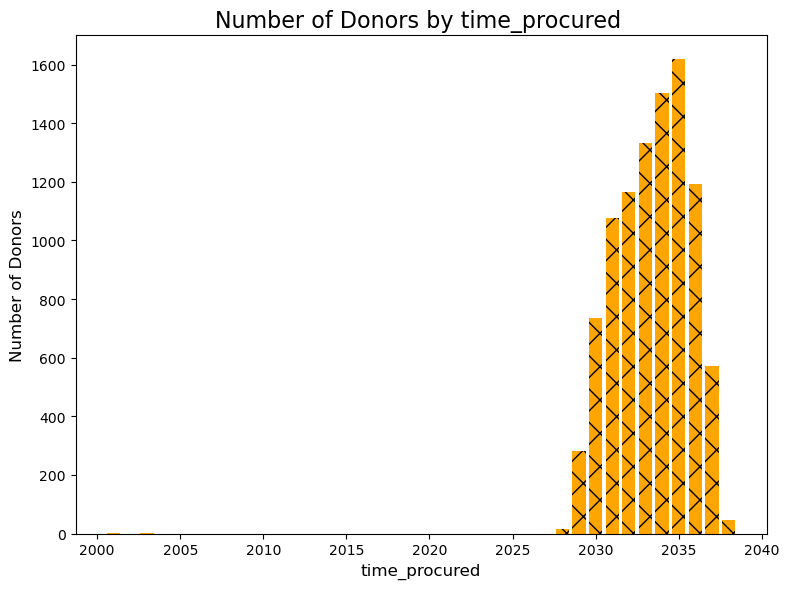

In [15]:
#10.Create a bar chart showing the number of donors by procured year. 
#Add hatching to the bars using the set_hatch() method, and exclude any outlier years.

# Merging two data sets of donor_details and referral_details
merged_don_ref_df=pd.merge(df_donor_details,df_referral_details,on='PatientID',how='left')
#merged_don_ref_df
merged_don_ref_df['time_procured']=pd.to_datetime(merged_don_ref_df['time_procured'])
#merged_don_ref_df['year']=merged_don_ref_df['time_procured'].dt.year


merged_don_ref_df_cleaned = merged_don_ref_df.dropna(subset=['time_procured'])
merged_don_ref_df_cleaned['Year'] = merged_don_ref_df_cleaned['time_procured'].dt.year
donors_by_year = merged_don_ref_df_cleaned.groupby('Year').size()

# Identify outlier years using IQR (Interquartile Range)
Q1 = donors_by_year.quantile(0.25)
Q3 = donors_by_year.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those outside of 1.5 * IQR range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

donors_by_year_cleaned = donors_by_year[(donors_by_year >= lower_bound) & (donors_by_year <= upper_bound)]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(donors_by_year_cleaned.index, donors_by_year_cleaned.values, color='orange')

for bar in bars:
    bar.set_hatch('x')  # 'x' creates a crosshatch pattern

ax.set_title('Number of Donors by time_procured ', fontsize=16)
ax.set_xlabel('time_procured', fontsize=12)
ax.set_ylabel('Number of Donors', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

11.Plot a Donut chart to show donor distribution by Gender.


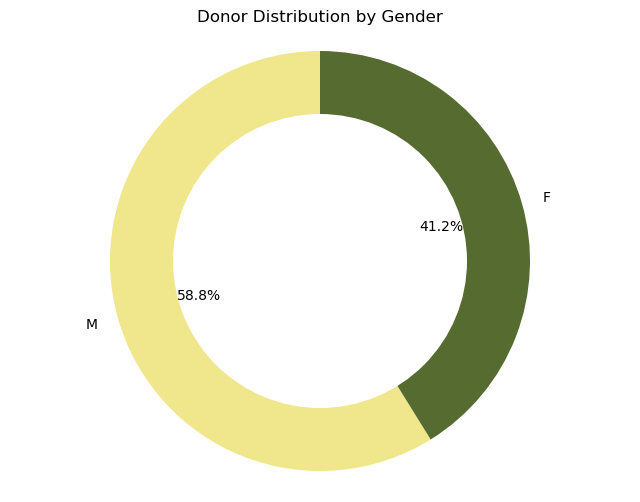

In [16]:
#11.Plot a Donut chart to show donor distribution by Gender.
#Donor detials table
df_donor_details

# count the number of donors by gender
gender_counts = df_donor_details['gender'].value_counts()

mycolors=['Khaki','DarkOliveGreen']

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=mycolors)

# Add a circle at the center to create a donut effect
centre_circle = plt.Circle((0, 0), 0.70, color='white', fc='white', linewidth=0)
plt.gca().add_artist(centre_circle)

plt.title('Donor Distribution by Gender')
plt.axis('equal')  
plt.show()


12.Using loc, retrieve the race and time of aysytole of donors between indices 1001 and 2001.

In [17]:
#12.Using loc, retrieve the race and time of aysytole of donors between indices 1001 and 2001.
df_donor_details.loc[1001:2001,['race','time_asystole','PatientID']]


race       time_asystole     PatientID
1001     White 2034-03-28 16:47:00  OPO1_P124711
1002  Hispanic                 NaT  OPO1_P934782
1003     White 2034-01-19 12:00:00  OPO1_P496267
1004  Hispanic 2032-01-19 18:49:00  OPO1_P962984
1005  Hispanic 2036-02-05 18:31:00  OPO1_P725315
...        ...                 ...           ...
1997  Hispanic 2037-05-19 23:10:00  OPO1_P136906
1998  Hispanic                 NaT  OPO1_P966799
1999     White 2034-11-20 21:21:00  OPO1_P636889
2000  Hispanic 2034-02-04 15:00:00  OPO1_P154285
2001     White 2035-06-15 05:58:00  OPO1_P693114

[1001 rows x 3 columns]

13.np.arange(1,31).reshape(6,5)
    1. Find array slicing to get the elements 1,2,8,30. 
    2. When the value is less than 9, print as 0,else print 99

In [18]:
#13.np.arange(1,31).reshape(6,5)
   # 1. Find array slicing to get the elements 1,2,8,30. 
   # 2. When the value is less than 9, print as 0,else print 99
arr1=np.arange(1,31).reshape(6,5)
arr1
print(arr1[0:1,0:2])
print(arr1[0,0])
print(arr1[0,1])
print(arr1[1,2])
print(arr1[5,4])




[[1 2]]
1
2
8
30


In [19]:
  # 13.2. When the value is less than 9, print as 0,else print 99
arr1=np.arange(1,31).reshape(6,5)
newarr=np.where(arr1<9,0,99)
newarr

array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0, 99, 99],
       [99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99]])

14.Create subplots for the following data
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x 
using an object-oriented approach, and arrange the subplots in a 2x2 grid layout

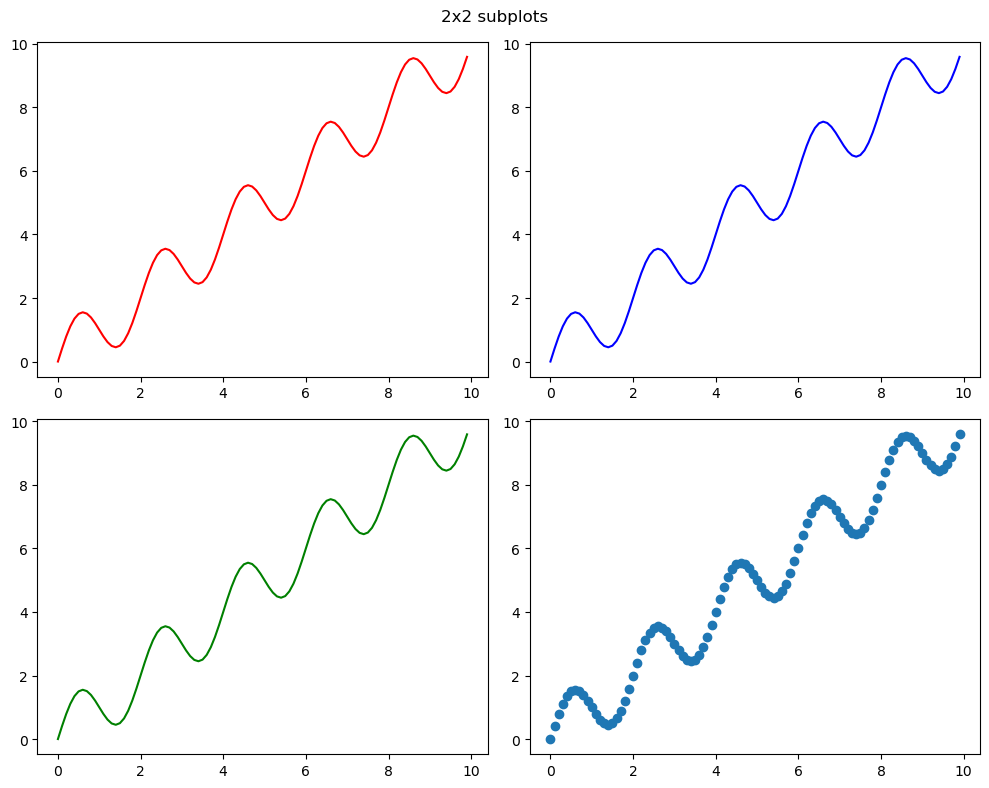

In [20]:
#14.Create subplots for the following data
#x = np.arange(0, 10, 0.1)
#y = np.sin(np.pi * x) + x 
#using an object-oriented approach, and arrange the subplots in a 2x2 grid layout
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x 
fig, axs=plt.subplots(2,2,figsize=(10,8))
axs[0][0].plot(x,y,'r')
axs[0][1].plot(x,y,'b')
axs[1][0].plot(x,y,'g')
axs[1][1].plot(x,y,'o')
fig.suptitle("2x2 subplots")

#axs[0][0].set_title("subplots")
plt.tight_layout()

15Create a box plot on any values in the dataset. Ensure that it is analytically correct.


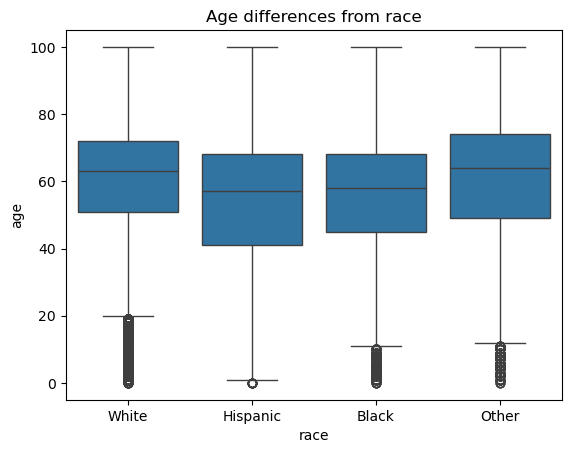

In [21]:
#15Create a box plot on any values in the dataset. Ensure that it is analytically correct.
# the average age of donors from the different race. 
import seaborn as sns
sns.boxplot(x='race',y='age',data=df_donor_details)
plt.title('Age differences from race')

plt.show()

In [64]:
!pip install plotly

In [ ]:
import plotly.express as px
import plotly.io as pio

In [24]:
df_donardetails = pd.read_excel('OrganDonor_Consolidated.xlsx')
opo_hospdetails = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='OPO_HospDetails')
dataframe_referraldetails = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='ReferralDetails')
df_yearlyoutcomes = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='Yearly_Outcomes')
dataframe_outcomes = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='Outcomes')


In [27]:
opo_hospdetails = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='OPO_HospDetails')

In [28]:
#Qu 16 -- How many donors were registered in each Organ Procurement Organization?

# Initialize an empty dictionary to store the donor counts for each OPO ID
opo_donor_count = {}
# Loop through the list of donor OPO IDs 
for opo in opo_hospdetails['OPO']:
    if opo in opo_donor_count:
        opo_donor_count[opo] += 1
    else:
        opo_donor_count[opo] = 1

# Display the count of donors for each OPO ID
for opo, count in opo_donor_count.items():
    print(f"{opo}: {count} donors")

OPO1: 32148 donors
OPO2: 16145 donors
OPO3: 12514 donors
OPO4: 33641 donors
OPO5: 15738 donors
OPO6: 22915 donors


In [35]:
dataframe_donardetails = pd.read_excel('OrganDonor_Consolidated.xlsx')

In [36]:
#17 Calculate the average time between referral and procurement for each mechanism of death

# Merge df_donardetails and dataframe_referraldetails  
merged_data = pd.merge(dataframe_donardetails, dataframe_referraldetails, on='PatientID', how='inner')

# Calculate time difference (procurement - referral)
merged_data['Time Difference'] = (merged_data['time_procured'] - merged_data['time_referred']).dt.total_seconds() / 3600  # Time difference 

# Group by 'Mechanism of Death' and calculate average time difference
avg_time_diff = merged_data.groupby('mechanism_of_death')['Time Difference'].mean().reset_index()

# Print the result
print(avg_time_diff)


           mechanism_of_death  Time Difference
0                Asphyxiation       110.935700
1                Blunt Injury       107.066895
2              Cardiovascular       100.448968
3   Death from Natural Causes        63.550680
4                    Drowning       116.006417
5           Drug Intoxication       104.320918
6                  Electrical       111.511563
7              Gun Shot Wound        95.280820
8               Gunshot Wound        72.290249
9              Natural Causes       106.429103
10          None of the Above       101.138974
11          None of the above        54.616667
12                      Other        56.929167
13                    Seizure       100.839926
14                       Stab        96.541678
15                     Stroke        86.378084
16        Sudden Infant Death        95.613979
17                    Unknown    -97002.425227


In [48]:
#18 What % of all referrals are procured?
dataframe_referraldetails = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='ReferralDetails')
# Convert timestamps to datetime
dataframe_referraldetails['time_referred'] = pd.to_datetime(dataframe_referraldetails['time_referred'])
dataframe_referraldetails['time_procured'] = pd.to_datetime(dataframe_referraldetails['time_procured'])

# Count total referrals and procured referrals
total_referrals = dataframe_referraldetails['time_referred'].notna().sum()  # Count total referrals
procured_referrals = dataframe_referraldetails['time_procured'].notna().sum()  # Count procured referrals

procured_percentage = (procured_referrals / total_referrals) * 100
print(f"Percentage of referrals that are procured: {procured_percentage:.2f}%")    

Percentage of referrals that are procured: 7.17%


In [50]:
#19 Write a function to calculate the year of birth for each patient using year of referral as a base.

# Extracting relevant columns
df_age = df_donardetails['age']
referrals_year = dataframe_referraldetails['Referral_Year']

# Merging both dataframes 
df_merged = pd.merge(df_donardetails, dataframe_referraldetails[['Referral_Year', 'PatientID']], on='PatientID', how='left')

# Function to calculate birth year
def calculate_birth_year(age, referral_year):
   
    return referral_year - age

# Applying the function to calculate 'Birth_Year'
df_merged['Birth_Year'] = df_merged.apply(
    lambda row: calculate_birth_year(row['age'], row['Referral_Year']), axis=1)

# Printing the result
print(df_merged[['age', 'Referral_Year', 'Birth_Year']])

         age  Referral_Year  Birth_Year
0       54.0           2021      1967.0
1       78.0           2017      1939.0
2       57.0           2018      1961.0
3       78.0           2019      1941.0
4       70.0           2018      1948.0
...      ...            ...         ...
133096  54.0           2018      1964.0
133097  63.0           2018      1955.0
133098  28.0           2018      1990.0
133099  85.0           2015      1930.0
133100  32.0           2019      1987.0

[133101 rows x 3 columns]


In [51]:
#20 How many patients have died of sepsis following drowning incidents?

#  Filter the dataset for drowning incidents
drowning_data = df_donardetails[df_donardetails['mechanism_of_death'] == 'Drowning']

# Filter for cases where sepsis was the cause of death
sepsis_deaths = drowning_data[drowning_data['causeofdeath'] == 'Sepsis']

# Count the number of cases
sepsis_death_count = sepsis_deaths.shape[0]

# Output the result
print(f"Number of patients who died from sepsis following drowning incidents: {sepsis_death_count}")

Number of patients who died from sepsis following drowning incidents: 1


In [52]:
#21 What percentage of all procurements are actually transplanted?


# Count total procurements
total_procurements = len(dataframe_referraldetails)

# Count transplanted procurements
transplanted_procurements = dataframe_referraldetails[dataframe_referraldetails['transplanted'] == 1].shape[0]  # assuming 1 means transplanted

# Calculate the percentage
percentage_transplanted = (transplanted_procurements / total_procurements) * 100

print(f"Percentage of transplanted procurements: {percentage_transplanted:.2f}%")

Percentage of transplanted procurements: 6.74%


In [53]:
#22 What is the ratio of referrals to procurements per year?

# Count the number of referrals per year
referrals_count = dataframe_referraldetails.groupby('Referral_Year').size()

# Count the number of procurements per year
procurements_count = dataframe_referraldetails.groupby('Procured_Year').size()

# Create a new DataFrame to combine both counts
yearly_data = pd.DataFrame({
    'Referrals': referrals_count,
    'Procurements': procurements_count
})

# Fill missing values with 0 
yearly_data = yearly_data.fillna(0)

# Calculate the ratio of referrals to procurements
yearly_data['Referral_to_Procurement_Ratio'] = yearly_data['Referrals'] / yearly_data['Procurements']

# Display the result
print(yearly_data)

        Referrals  Procurements  Referral_to_Procurement_Ratio
1987.0        0.0             2                       0.000000
2015.0    12910.0          1027                      12.570594
2016.0    12840.0          1070                      12.000000
2017.0    14583.0          1143                      12.758530
2018.0    19175.0          1337                      14.341810
2019.0    20927.0          1637                      12.783751
2020.0    24996.0          1649                      15.158278
2021.0    27670.0          1670                      16.568862
2022.0        0.0             8                       0.000000


In [54]:
# 23 --How many referrals occurred in 2018?

referrals_2018 = dataframe_referraldetails[dataframe_referraldetails['Referral_Year'] == 2018].shape[0]
print(f"Number of referrals in 2018: {referrals_2018}")


Number of referrals in 2018: 19175


In [55]:
#24 Which hospital had the lowest rate of lung transplants? Procured but not transplanted

# Merging  dataframes 
df_merged = pd.merge(dataframe_outcomes,opo_hospdetails,on='PatientID',how='inner')

df_merged['lung_left_transplanted'] = df_merged['outcome_lung_left'].notna()
df_merged['lung_right_transplanted'] = df_merged['outcome_lung_right'].notna()

# Mark rows where either the left or right lung is transplanted
df_merged['lung_transplanted'] = df_merged['lung_left_transplanted'] | df_merged['lung_right_transplanted']

# Count how many lungs were procured but not transplanted (group by hospital)
# A lung is considered procured but not transplanted if it's not transplanted 
hospital_summary = df_merged.groupby('HospitalID').agg(
    lungs_procured=('PatientID', 'count'),  # Total lungs procured (i.e., total rows per hospital)
    lungs_transplanted=('lung_transplanted', 'sum')  # Total number of transplanted lungs
)

# Calculate the number of lungs procured but not transplanted
hospital_summary['lungs_procured_but_not_transplanted'] = hospital_summary['lungs_procured'] - hospital_summary['lungs_transplanted']

# Calculate the rate of procured but not transplanted lungs
hospital_summary['procured_but_not_transplanted_rate'] = hospital_summary['lungs_procured_but_not_transplanted'] / hospital_summary['lungs_procured']

# Identify the hospital with the lowest rate
lowest_rate_hospital = hospital_summary.loc[hospital_summary['procured_but_not_transplanted_rate'].idxmin()]

# Display the hospital with the lowest procured but not transplanted rate
print("Hospital with the lowest rate of procured but not transplanted lungs:")
print(lowest_rate_hospital)

Hospital with the lowest rate of procured but not transplanted lungs:
lungs_procured                         1.0
lungs_transplanted                     1.0
lungs_procured_but_not_transplanted    0.0
procured_but_not_transplanted_rate     0.0
Name: OPO1_H15524, dtype: float64


In [56]:
#25 In donors where brain death occurred, what was the time difference between brain death and asystole?
 
# handling invalid formats
df_donardetails['time_brain_death'] = pd.to_datetime(df_donardetails['time_brain_death'], errors='coerce')
df_donardetails['time_asystole'] = pd.to_datetime(df_donardetails['time_asystole'], errors='coerce')

# Dropping rows where 'time_asystole' or 'time_brain_death' is missing
df_donardetails = df_donardetails.dropna(subset=['time_asystole', 'time_brain_death'])

# Calculate the time difference
df_donardetails['time_diff'] = df_donardetails.apply(
    lambda row: row['time_asystole'] - row['time_brain_death'] if row['brain_death'] else pd.NaT,
    axis=1
)
# Output the result
print(df_donardetails[['brain_death', 'time_brain_death', 'time_asystole', 'time_diff']])


        brain_death    time_brain_death       time_asystole       time_diff
114               1 2034-07-14 18:07:00 2034-07-15 14:15:00 0 days 20:08:00
135               1 2037-01-07 11:45:00 2037-01-08 08:20:00 0 days 20:35:00
154               1 2035-01-04 15:59:00 2035-01-04 23:36:00 0 days 07:37:00
159               1 2033-10-30 09:00:00 2033-10-30 18:15:00 0 days 09:15:00
239               1 2037-09-06 18:35:00 2037-09-09 15:44:00 2 days 21:09:00
...             ...                 ...                 ...             ...
129973            1 2033-06-07 19:20:00 2033-06-10 00:13:00 2 days 04:53:00
130627            1 2034-01-21 16:02:00 2034-01-21 16:02:00 0 days 00:00:00
131195            1 2031-05-14 21:01:00 2031-05-14 23:00:00 0 days 01:59:00
131656            1 2033-04-12 15:07:00 2033-04-13 06:45:00 0 days 15:38:00
132866            1 2032-05-15 16:47:00 2032-05-15 16:47:00 0 days 00:00:00

[3521 rows x 4 columns]


In [57]:
#26 Which OPO recorded the highest calculated deaths in the year 2015?

# Filter the data for the year 2015
df_2015 = df_yearlyoutcomes [df_yearlyoutcomes ['Year'] == 2015]

# Find the OPO with the highest number of recorded deaths
highest_deaths = df_2015.loc[df_2015['mean calc deaths'].idxmax()]

# Output the OPO with the highest recorded deaths in 2015
print(f"The OPO with the highest calculated deaths in 2015 is {highest_deaths['OPO']} with {highest_deaths['mean calc deaths']} deaths.")

The OPO with the highest calculated deaths in 2015 is OPO4 with 3074.575 deaths.


In [58]:
#27 Create a pivot table shows organ-based outcome type as rows and outcome statuses as columns

# Melt the DataFrame to long format
df_pivot_data = pd.melt(dataframe_outcomes, id_vars=['PatientID'], value_vars=['outcome_heart', 'outcome_liver', 'outcome_kidney_left', 
                                                          'outcome_kidney_right', 'outcome_lung_left', 'outcome_lung_right', 
                                                          'outcome_intestine', 'outcome_pancreas'],
                    var_name='organ_based_outcome_type', value_name='outcome_status')

# Create the pivot table
pivot_table = pd.pivot_table(df_pivot_data, 
                             index='organ_based_outcome_type', 
                             columns='outcome_status', 
                             aggfunc='size', 
                             fill_value=0)

# Display the pivot table
print(pivot_table)

outcome_status            Recovered for Research  \
organ_based_outcome_type                           
outcome_heart                                682   
outcome_intestine                            279   
outcome_kidney_left                          466   
outcome_kidney_right                         459   
outcome_liver                                533   
outcome_lung_left                           1182   
outcome_lung_right                          1246   
outcome_pancreas                             627   

outcome_status            Recovered for Transplant but not Transplanted  \
organ_based_outcome_type                                                  
outcome_heart                                                        21   
outcome_intestine                                                     4   
outcome_kidney_left                                                1252   
outcome_kidney_right                                               1300   
outcome_liver                

In [59]:
#29 How many deaths were registered with OPO 1? List them by year.

#Check for OPO1
df_OPO1 =  df_yearlyoutcomes[df_yearlyoutcomes['OPO'] == 'OPO1']
print(df_OPO1)


     OPO  Year  mean calc deaths
30  OPO1  2015           2852.69
31  OPO1  2016           2954.13
32  OPO1  2017           3112.34
33  OPO1  2018           3019.04
34  OPO1  2019           3148.80
35  OPO1  2020           3236.50


In [60]:
#31 How many donors with a successful transplant died of a seizure?

# Merge dataframe_donardetails and dataframe_referraldetails 
merged_data = pd.merge(dataframe_donardetails, dataframe_referraldetails, on='PatientID', how='inner')

#Filter the merged DataFrame for successful transplants and cause of death 'Seizure'
successful_donors = merged_data[(merged_data['causeofdeath'] == 'Seizure') & (merged_data['transplanted'] == 1)]

# Count how many donors died of seizures after a successful transplant
num_donors_with_seizure = successful_donors.shape[0]

# Output the result
print(f"Number of donors with a successful transplant who died of a seizure: {num_donors_with_seizure}")



Number of donors with a successful transplant who died of a seizure: 3


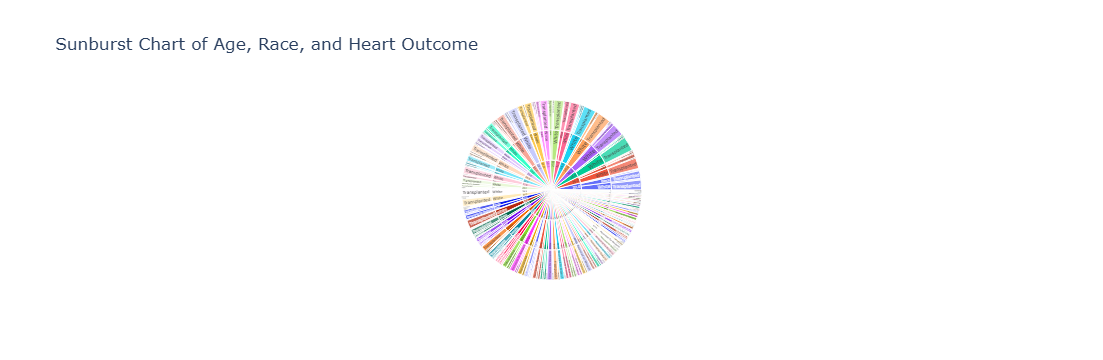

In [67]:
#32 Create a sunburst chart of age, race and any one outcome
import plotly.express as px
import plotly.io as pio
# Merge the dataframes based on the 'PatientID' column
merged_data = pd.merge(df_donardetails, dataframe_outcomes, on='PatientID', how='inner')

# Drop rows with missing values in 'age', 'race', or 'outcome_heart'
merged_data_clean = merged_data.dropna(subset=['age', 'race', 'outcome_heart'])

# Group the data by age, race, and outcome_heart, then count the occurrences
grouped_data = merged_data_clean.groupby(['age', 'race', 'outcome_heart']).size().reset_index(name='count')


# Create the sunburst chart
sunburst = px.sunburst(grouped_data, path=['age', 'race', 'outcome_heart'], values='count',
                  title="Sunburst Chart of Age, Race, and Heart Outcome")

# Show the plot

sunburst.show()

In [66]:
#Question 33.Which year had the maximum referrals
dfs = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'ReferralDetails' )
yearwise_count = dfs['Referral_Year'].value_counts()
maxcount_year = yearwise_count.idxmax()
print(f"The Year with maximum referrals is {maxcount_year}")

The Year with maximum referrals is 2021


In [68]:
#Question 34 How Many Organs are recovered for transplant but not transplanted?
dfs1 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'Outcomes' )
valuetobe_counted = 'Recovered for Transplant but not Transplanted'
column_names  = dfs1.columns #['outcome_heart','outcome_liver','outcome_kidney_left','outcome_kidney_right','outcome_lung_left','outcome_lung_right','outcome_intestine','outcome_pancreas']
count = 0
for column_name in column_names:
    count  += dfs1[column_name].value_counts().get(valuetobe_counted,0)
    
print(count)

3245


In [69]:
#Question 35 . What are the 3 most frequenst causes of death?
dfs2 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'DonorDetails' )
cause_death = dfs2['causeofdeath'].value_counts()
most_frequent = cause_death.head(3)

key_cause = ' , '.join(most_frequent.keys())
print(f"The 3 most frequent causes of death are {key_cause}")

The 3 most frequent causes of death are Anoxia , Unknown , cerebrovascular accident


In [70]:
#Question 36.How many transplants were registered under each OPO?
dfs3 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'OPO_HospDetails' )
transplants_eachopo = dfs3['OPO'].value_counts()
print(transplants_eachopo)

OPO
OPO4    33641
OPO1    32148
OPO6    22915
OPO2    16145
OPO5    15738
OPO3    12514
Name: count, dtype: int64


In [ ]:
#Question 37.Plot a stacked bar chart to show different procurement outcomes for organs - heart, liver, and pancreas.
 #Label the bars with the actual numbers for each outcome.

In [71]:
#Question 38.What percentage of all transplants are lung transplants
dfs1 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'Outcomes' )
count_patients = len(dfs1)

valuetobe_counted = 'Transplanted'


count_left = dfs1['outcome_lung_left'].value_counts()
count_left_transplanted = count_left.get(valuetobe_counted, 0)


count_right = dfs1['outcome_lung_right'].value_counts()
count_right_transplanted = count_right.get(valuetobe_counted, 0)


# percentage of left lung transplants
percentage_left_lung = (count_left_transplanted/count_patients)*100
percentage_right_lung = (count_right_transplanted/count_patients)*100
print(f"Percentage of left lung transplants is : {percentage_left_lung:.2f}%")
print(f"Percentage of right lung transplants is: {percentage_right_lung:.2f}%")

Percentage of left lung transplants is : 22.51%
Percentage of right lung transplants is: 22.31%


In [72]:
#Question 39.Which year had the maximum number of procurements?
dfs = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'ReferralDetails' )
date_column = 'time_procured' 
dfs[date_column] = pd.to_datetime(dfs[date_column])
dfs['year'] = dfs[date_column].dt.year
year_count = dfs['year'].value_counts()
max_year = year_count.idxmax()
max_count = year_count.max()
print(f"The year with the maximum procurements is {int(max_year)} with {max_count} procurements.")

The year with the maximum procurements is 2035 with 1619 procurements.


In [73]:
#Question 40.Create a dataframe with date and time as columns, where the values are the referral time.
dfs = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'ReferralDetails' )
datestamp_column = 'time_referred'
dfs[datestamp_column] = pd.to_datetime(dfs[datestamp_column], errors='coerce')
dfs['PID'] = dfs['PatientID']
dfs['Date'] = dfs[datestamp_column].dt.strftime('%m/%d/%Y')
dfs['Referral Time'] = dfs[datestamp_column].dt.strftime('%I:%M %p')
print(dfs[['PID','Date','Referral Time']])

                 PID        Date Referral Time
0       OPO1_P320866  06/21/2033      06:49 AM
1       OPO1_P549364  11/21/2036      08:41 AM
2       OPO1_P536997  08/23/2030      11:28 PM
3       OPO1_P463285  05/12/2034      05:34 PM
4       OPO1_P284978  02/22/2033      04:45 AM
...              ...         ...           ...
133096  OPO6_P384794  07/10/2034      01:26 PM
133097  OPO6_P902138  08/04/2035      05:13 AM
133098    OPO6_P5461  03/13/2031      08:13 PM
133099  OPO6_P942291  11/20/2032      01:32 PM
133100  OPO6_P210235  02/26/2030      05:22 AM

[133101 rows x 3 columns]


In [ ]:
#Question 41.Create a pair plot of the outcomes, using different outcome statuses as the hue.

In [74]:
#Question 42.What is the ratio of referrals to transplants by year?
yearly_counts = dfs['Referral_Year'].value_counts()
count_transplanted =dfs[dfs['transplanted'] == 1].groupby('Referral_Year').size()
ratio = yearly_counts / count_transplanted
print(ratio.round(2))

Referral_Year
2015    13.19
2016    12.63
2017    13.26
2018    15.06
2019    13.45
2020    16.36
2021    18.22
dtype: float64


In [75]:
#Question 43.How many donors died from a drug overdose?
dfs2 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'DonorDetails' )
cause_death = dfs2['causeofdeath'].value_counts()
count_DrugOverdose = cause_death.get('Drug Overdose',0)
print(f"Number of Donors died from Drug Overdose are : {count_DrugOverdose}")

Number of Donors died from Drug Overdose are : 156


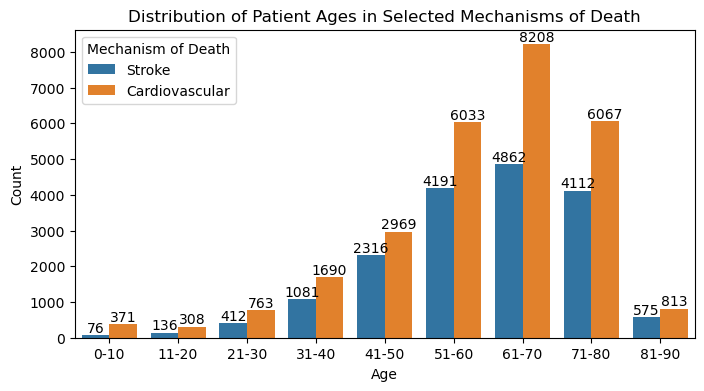

In [76]:
#Question 44.Create a count plot to show distribution of patient-ages in any 2 mechanisms of death.
dfs2 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'DonorDetails' )
step_size = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
groups = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
dfs2['age_group'] = pd.cut(dfs2['age'], bins=step_size, labels=groups, right=False)
mech_of_death = ['Stroke','Cardiovascular' ]
selected_mechofdeath = dfs2[dfs2['mechanism_of_death'].isin(mech_of_death)]
plt.figure(figsize=(8, 4))
dee = sns.countplot(data=selected_mechofdeath, x='age_group', hue='mechanism_of_death')
for container in dee.containers:
   dee.bar_label(container, fmt='%d', label_type='edge')
plt.title('Distribution of Patient Ages in Selected Mechanisms of Death')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Mechanism of Death')
#plt.tight_layout()
plt.show()

In [77]:
#Question 45.Create a Waffle chart to show what percentage of total deaths belong to each mechanism
import matplotlib as mpl
dfs2 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'DonorDetails' )
count_of_mech = dfs2['mechanism_of_death'].value_counts()
total_deaths = len(dfs2)
percentages_each_mech = (count_of_mech / total_deaths * 100).round(2)
print(percentages_each_mech)






mechanism_of_death
Unknown                      25.97
Cardiovascular               20.49
Natural Causes               19.45
Stroke                       13.36
None of the Above             6.58
Blunt Injury                  6.25
Drug Intoxication             2.88
Gun Shot Wound                1.50
Asphyxiation                  1.46
Death from Natural Causes     0.67
Seizure                       0.58
Drowning                      0.38
Gunshot Wound                 0.22
Other                         0.08
Stab                          0.06
Electrical                    0.04
Sudden Infant Death           0.03
None of the above             0.01
Name: count, dtype: float64


In [78]:
#Question 46.How many donors were registered under each hospital?
dfs3 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'OPO_HospDetails' )
donors_eachhosp = dfs3['HospitalID'].value_counts()
print(donors_eachhosp)

HospitalID
OPO4_H16532    3682
OPO6_H22175    3629
OPO6_H6602     3578
OPO3_H4291     3123
OPO4_H30877    2335
               ... 
OPO5_H11845       1
OPO2_H6517        1
OPO2_H5905        1
OPO2_H158         1
OPO6_H21263       1
Name: count, Length: 557, dtype: int64


In [79]:
#Question 47.What is the predominant 'identified mechanism of death' among the youngest donors in the dataset.
dfs2 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'DonorDetails' )
youngest_donor_age = dfs2['age'].min()
youngest_donors = dfs2[dfs2['age']== youngest_donor_age]
mech_of_death = youngest_donors['causeofdeath'].value_counts()
max_mech_of_death = mech_of_death.idxmax()
print(f" The predominant mechanism of death among the youngest donors who is of age {int(youngest_donor_age)} is {max_mech_of_death}")

 The predominant mechanism of death among the youngest donors who is of age 0 is Unknown


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [80]:
df_donor_details = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='DonorDetails')
df_donor_details

PatientID   age gender      race              causeofdeath  \
0       OPO1_P155959  54.0      M     White                   Unknown   
1       OPO1_P297347  78.0      M  Hispanic                   Unknown   
2       OPO1_P399316  57.0      M  Hispanic                    Anoxia   
3       OPO1_P246407  78.0      F     Black  cerebrovascular accident   
4       OPO1_P187209  70.0      F     White                   Unknown   
...              ...   ...    ...       ...                       ...   
133096   OPO6_P54946  54.0      F     Black                    Anoxia   
133097  OPO6_P630991  63.0      M     Black  cerebrovascular accident   
133098    OPO6_P8748  28.0      M     White                    Anoxia   
133099    OPO6_P5461  85.0      F     White                    Anoxia   
133100  OPO6_P942291  32.0      M     Black                     Other   

       mechanism_of_death  brain_death       time_asystole time_brain_death  
0                 Unknown            0 2036-01-02 18:26:00              NaT  
1                 Unknown            0 2031-12-24 14:06:00              NaT  
2                 Unknown            0 2034-05-11 00:00:00              NaT  
3                  Stroke            0 2035-06-14 14:18:00              NaT  
4                 Unknown            0 2034-02-18 18:50:00              NaT  
...                   ...          ...                 ...              ...  
133096     Natural Causes            0 2032-09-16 02:34:00              NaT  
133097             Stroke            0 2034-06-06 22:14:00              NaT  
133098  Drug Intoxication            0                 NaT              NaT  
133099     Cardiovascular            0                 NaT              NaT  
133100     Natural Causes            0                 NaT              NaT  

[133101 rows x 9 columns]

In [81]:
cause_of_death=df_donor_details['causeofdeath'].unique()
print(cause_of_death)

['Unknown' 'Anoxia' 'cerebrovascular accident' 'Head Trauma' 'Other'
 'CNS Tumor' 'Stroke' 'Pneumonia' 'Sepsis' 'ESLD' 'Respiratory - Other'
 'Infectious Disease - Viral' 'Cancer' 'Cardiac Arrest'
 'Multi-system failure' 'Infectious Disease - Bacterial' 'CHF'
 'Other, specify' 'thoracic aortic aneurysm' 'Pulmonary embolism' 'GSW'
 'COPD' 'Myocardial infarction' 'Overdose' 'Hepatitis'
 'Sudden infant death syndrome' 'ESRD' 'Trauma'
 'Infectious Disease - Other' 'Exsanguination' 'HIV' 'Arrhythmia'
 'Fetal Demise' 'SAH' 'Drowning' 'Prematurity' 'Thoracic aortic aneurysm'
 'TR - GSW' 'Intracranial Hemorrhage' 'cerebral vascular accident'
 'TR - other' 'RES - pneumonia' 'GI - bleed' 'Septic Shock'
 'MultiSystem Failure' 'TR - MVA' 'RES - other' 'RES - COPD'
 'Liver Disease/Failure' 'other' 'asphyixiation' 'Renal  Disease'
 'Drug Overdose' 'RES - lung disease' 'PED - other'
 'TR - CHI - Closed Head Injury' 'Pulmonary Embolism' 'Natural Causes'
 'Meningitis' 'Aneurysm' 'RES - asthma' 'GI - ne

In [82]:
df_referral_details = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='ReferralDetails')
df_referral_details

PatientID  Approached Relatives  Authorized By Family  \
0       OPO1_P320866                     0                     0   
1       OPO1_P549364                     0                     0   
2       OPO1_P536997                     1                     0   
3       OPO1_P463285                     0                     0   
4       OPO1_P284978                     0                     0   
...              ...                   ...                   ...   
133096  OPO6_P384794                     0                     0   
133097  OPO6_P902138                     0                     0   
133098    OPO6_P5461                     0                     0   
133099  OPO6_P942291                     0                     0   
133100  OPO6_P210235                     0                     0   

        Cross_Clamped  transplanted  Tissue_Referral  Eye_Referral  \
0                   0             0                1             1   
1                   0             0                1             1   
2                   0             0                1             1   
3                   0             0                1             1   
4                   0             0                1             1   
...               ...           ...              ...           ...   
133096              0             0                1             1   
133097              0             0                1             1   
133098              0             0                1             1   
133099              0             0                1             1   
133100              0             0                1             1   

                 time_referred time_approached time_authorized time_procured  \
0      2033-06-21 06:49:25.000             NaT             NaT           NaT   
1      2036-11-21 08:41:13.397             NaT             NaT           NaT   
2      2030-08-23 23:28:54.687             NaT             NaT           NaT   
3      2034-05-12 17:34:52.277             NaT             NaT           NaT   
4      2033-02-22 04:45:27.867             NaT             NaT           NaT   
...                        ...             ...             ...           ...   
133096 2034-07-10 13:26:00.000             NaT             NaT           NaT   
133097 2035-08-04 05:13:00.000             NaT             NaT           NaT   
133098 2031-03-13 20:13:00.000             NaT             NaT           NaT   
133099 2032-11-20 13:32:00.000             NaT             NaT           NaT   
133100 2030-02-26 05:22:00.000             NaT             NaT           NaT   

       Referral_DayofWeek  Referral_Year  Procured_Year  
0                 Tuesday           2018            NaN  
1                  Sunday           2021            NaN  
2                  Friday           2015            NaN  
3                  Monday           2019            NaN  
4                  Friday           2018            NaN  
...                   ...            ...            ...  
133096            Tuesday           2019            NaN  
133097             Monday           2021            NaN  
133098             Sunday           2015            NaN  
133099            Tuesday           2019            NaN  
133100             Monday           2015            NaN  

[133101 rows x 14 columns]

In [83]:
df_outcomes = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='Outcomes')
df_outcomes

PatientID           outcome_heart           outcome_liver  \
0     OPO1_P648384            Transplanted            Transplanted   
1     OPO1_P635213            Transplanted            Transplanted   
2     OPO1_P404478                     NaN            Transplanted   
3     OPO1_P340806                     NaN            Transplanted   
4     OPO1_P278912                     NaN            Transplanted   
...            ...                     ...                     ...   
9529  OPO6_P925470                     NaN            Transplanted   
9530  OPO6_P273753                     NaN            Transplanted   
9531  OPO6_P751972                     NaN                     NaN   
9532  OPO6_P667026                     NaN            Transplanted   
9533  OPO6_P721333  Recovered for Research  Recovered for Research   

                                outcome_kidney_left  \
0                                      Transplanted   
1                                      Transplanted   
2                                      Transplanted   
3     Recovered for Transplant but not Transplanted   
4     Recovered for Transplant but not Transplanted   
...                                             ...   
9529                                   Transplanted   
9530                                   Transplanted   
9531  Recovered for Transplant but not Transplanted   
9532                                   Transplanted   
9533                                   Transplanted   

                               outcome_kidney_right outcome_lung_left  \
0                                      Transplanted      Transplanted   
1                                      Transplanted               NaN   
2                                      Transplanted      Transplanted   
3     Recovered for Transplant but not Transplanted      Transplanted   
4     Recovered for Transplant but not Transplanted               NaN   
...                                             ...               ...   
9529                                   Transplanted               NaN   
9530                                   Transplanted               NaN   
9531  Recovered for Transplant but not Transplanted               NaN   
9532                                   Transplanted      Transplanted   
9533                                   Transplanted               NaN   

     outcome_lung_right outcome_intestine  \
0          Transplanted               NaN   
1          Transplanted               NaN   
2          Transplanted               NaN   
3          Transplanted               NaN   
4                   NaN               NaN   
...                 ...               ...   
9529                NaN               NaN   
9530                NaN               NaN   
9531                NaN               NaN   
9532       Transplanted               NaN   
9533                NaN               NaN   

                                   outcome_pancreas  
0     Recovered for Transplant but not Transplanted  
1                                      Transplanted  
2                                               NaN  
3                                               NaN  
4                            Recovered for Research  
...                                             ...  
9529                                   Transplanted  
9530                                            NaN  
9531                                            NaN  
9532                                   Transplanted  
9533                                            NaN  

[9534 rows x 9 columns]

In [84]:
df_opo_hospdetails = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='OPO_HospDetails')
df_opo_hospdetails

OPO     PatientID   HospitalID
0       OPO1  OPO1_P320866  OPO1_H23456
1       OPO1  OPO1_P549364  OPO1_H11908
2       OPO1  OPO1_P536997  OPO1_H23111
3       OPO1  OPO1_P463285  OPO1_H26589
4       OPO1  OPO1_P284978   OPO1_H5832
...      ...           ...          ...
133096  OPO6  OPO6_P384794    OPO6_H591
133097  OPO6  OPO6_P902138   OPO6_H2898
133098  OPO6    OPO6_P5461  OPO6_H18156
133099  OPO6  OPO6_P942291   OPO6_H6602
133100  OPO6  OPO6_P210235    OPO6_H591

[133101 rows x 3 columns]

In [85]:
df_yearly_outcomes = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='Yearly_Outcomes')
df_yearly_outcomes

OPO  Year  mean calc deaths
0   OPO4  2015          3074.575
1   OPO4  2016          3146.335
2   OPO4  2017          3163.300
3   OPO4  2018          3079.760
4   OPO4  2019          3125.530
5   OPO4  2020          3201.240
6   OPO6  2015          1252.000
7   OPO6  2016          1263.000
8   OPO6  2017          1388.000
9   OPO6  2018          1388.000
10  OPO6  2019          1349.000
11  OPO6  2020          1437.000
12  OPO2  2015          1596.000
13  OPO2  2016          1672.000
14  OPO2  2017          1790.000
15  OPO2  2018          1690.000
16  OPO2  2019          1660.000
17  OPO2  2020          1740.000
18  OPO5  2015          1515.330
19  OPO5  2016          1534.255
20  OPO5  2017          1668.210
21  OPO5  2018          1576.240
22  OPO5  2019          1556.000
23  OPO5  2020          1640.450
24  OPO3  2015           675.560
25  OPO3  2016           656.265
26  OPO3  2017           730.305
27  OPO3  2018           767.265
28  OPO3  2019           780.070
29  OPO3  2020           710.210
30  OPO1  2015          2852.690
31  OPO1  2016          2954.130
32  OPO1  2017          3112.340
33  OPO1  2018          3019.040
34  OPO1  2019          3148.800
35  OPO1  2020          3236.500

In [86]:
race_values=df_donor_details['race'].unique()
print(race_values)

['White' 'Hispanic' 'Black' 'Other']


In [87]:
!pip install ydata-profiling

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/666.4 kB ? eta -:--:--
   ---------------------------------------- 666.4/666.4 kB 4.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=fcb7420988e3f605e6aa16499bdfe2227f0d298bdd03e68e23a54797e28142d0
  Stored in directory: c:\users\kbaks\appdata\local\pip\cache\wheels\5f\d4\d7\4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin


In [88]:
from ydata_profiling import ProfileReport

In [128]:
#49) Perform an EDA of hosp_details using YDATA Profiling
exploratory_da=ProfileReport(df_opo_hospdetails,title="EDA Report",explorative=True)
exploratory_da.to_file("EDA Report.html")
exploratory_da.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [91]:
# 50) In how many cases were the relatives approached for consent vs how many were authorized
#used the function len to get the number of cases 
Rel_consent_df = len(df_referral_details[df_referral_details['Approached Relatives']==1])
print(f"Count by Relatives Consent:{Rel_consent_df}")
Auth_df=len(df_referral_details[df_referral_details['Authorized By Family']==1])
print(f"Count Authorized by Family:{Auth_df}")

Count by Relatives Consent:19551
Count Authorized by Family:11989


In [92]:
#for question 50 used value_counts to see the number of cases for the category/just tried an alternate way
Rel_consent_df = df_referral_details['Approached Relatives'].value_counts()
print(Rel_consent_df)

Approached Relatives
0    113550
1     19551
Name: count, dtype: int64


In [93]:
#51 Which OPO recorded the lowest calculated deaths in any year? 
#used idxmin to find the lowest value in that column
opo_min_death=df_yearly_outcomes.loc[df_yearly_outcomes['mean calc deaths'].idxmin()]
print(opo_min_death)

OPO                    OPO3
Year                   2016
mean calc deaths    656.265
Name: 25, dtype: object


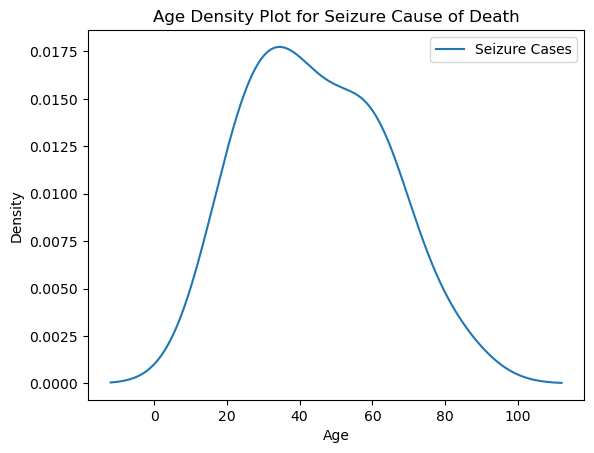

In [94]:
#52) plot the density chart for cause of death - seizure against any other variable of your choice?
df_donor_details[df_donor_details['causeofdeath']=='Seizure']['age'].plot.kde(label='Seizure Cases')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Density Plot for Seizure Cause of Death')
plt.legend()
plt.show()

0.0
100.0
corr:
 causeofdeath                  AIDS  Aneurysm    Anoxia  Arrhythmia       CHF  \
causeofdeath                                                                   
AIDS                      1.000000  0.714569  0.822538    0.476731  0.597581   
Aneurysm                  0.714569  1.000000  0.982654    0.903638  0.981126   
Anoxia                    0.822538  0.982654  1.000000    0.821930  0.930036   
Arrhythmia                0.476731  0.903638  0.821930    1.000000  0.966357   
CHF                       0.597581  0.981126  0.930036    0.966357  1.000000   
...                            ...       ...       ...         ...       ...   
drowning                 -0.577350 -0.499410 -0.489134   -0.660578 -0.543835   
hanging                   0.644831 -0.072754  0.103378   -0.324179 -0.225028   
other                     0.967901  0.832189  0.920000    0.569718  0.718744   
smoke inhalation         -0.301511 -0.011340 -0.020495   -0.229984 -0.062095   
thoracic aortic aneurys

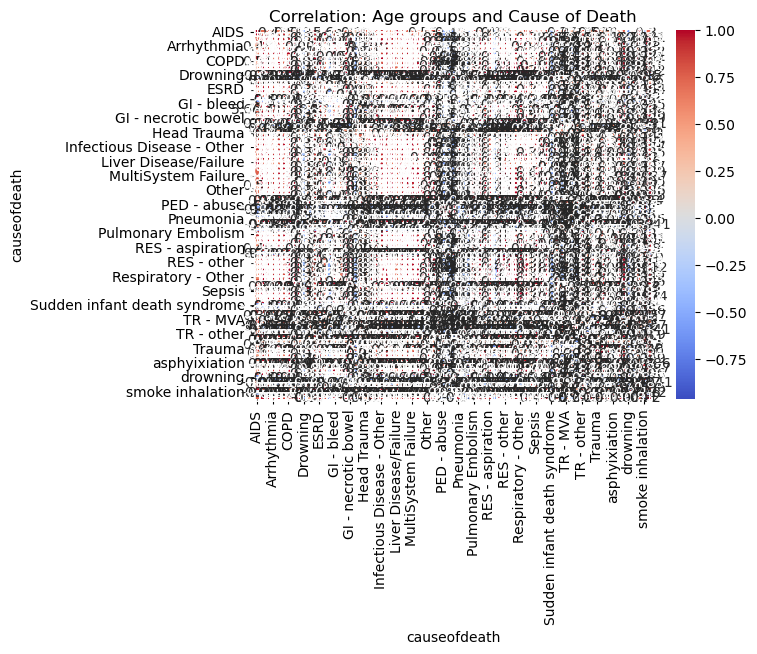

In [127]:
#53) Display a correlation matrix showing count of donors in age group vs cause of death
#find the min and max age in the age column and make bins for it
min_age=df_donor_details['age'].min()
print(min_age)
max_age=df_donor_details['age'].max()
print(max_age)
bins_age=[0,25,50,75,100]
labels_age=['Under 25','25-50','50-75','75-100']
df_donor_details['age_group']=pd.cut(df_donor_details['age'],bins=bins_age,labels=labels_age)
age_cod_count=df_donor_details.groupby(['age_group','causeofdeath'],observed=False).size().unstack().fillna(0)
corr=age_cod_count.corr()
print("corr:\n",corr)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation: Age groups and Cause of Death')
plt.show(block=True)

In [96]:
#54 Connect to sql and write a query to find all donors who's cause of death is unknown 
#plpgsql connection

from sqlalchemy import create_engine
import pandas as pd

db_host="localhost"
db_port="5432"
db_name="OPO_DB"
db_user="postgres"
db_password="postgres"

connection_string=f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
        
engine=create_engine(connection_string)

try:
    with engine.connect() as connection:
        print("Connected to Postgresql")
except Exception as e:
    print("Connection failed:", e)
    raise

    
df_donor_details.to_sql('donor_details', engine, if_exists='replace', index=False)
df_referral_details.to_sql('referral_details', engine, if_exists='replace', index=False)
df_outcomes.to_sql('outcomes', engine, if_exists='replace', index=False)
df_opo_hospdetails.to_sql('opo_hospdetails', engine, if_exists='replace', index=False)
df_yearly_outcomes.to_sql('yearly_outcomes', engine, if_exists='replace', index=False)

print("Data loaded to postgresql")

NameError: name 'create_engine' is not defined

In [97]:
#55 Who was the youngest white donor regsitered?
Youngest1_White_donor=df_donor_details.loc[df_donor_details['race']=='White'].nsmallest(1,'age')
print(Youngest1_White_donor)

         PatientID  age gender   race causeofdeath mechanism_of_death  \
5188  OPO1_P317726  0.0      F  White      Unknown  None of the Above   

      brain_death       time_asystole time_brain_death age_group  
5188            0 2029-04-03 20:39:00              NaT       NaN  


In [98]:
#for ques 55, the approached tried earlier had the patient with age 0 so added another filter where age>1 to see the result
Youngest2_White_donor=df_donor_details.loc[(df_donor_details['race']=='White')&(df_donor_details['age']>0)].nsmallest(1,'age')
print(Youngest2_White_donor)

         PatientID  age gender   race causeofdeath mechanism_of_death  \
1453  OPO1_P398657  1.0      M  White      Unknown            Unknown   

      brain_death       time_asystole time_brain_death age_group  
1453            0 2034-08-18 20:15:00              NaT  Under 25  


In [99]:
#56 what is the average time difference between brain death and time_approached
#merge the two dataframes 
df_mergedset=pd.merge(df_donor_details,df_referral_details,on='PatientID',how='inner')
#select the cases where brain death is 1
df_mergedset=df_mergedset[df_mergedset['brain_death']==1]
#find the difference between brain death and time_approached
df_mergedset['time_diff']=df_mergedset['time_approached']-df_mergedset['time_brain_death']
avg_time=df_mergedset['time_diff'].mean()
print({avg_time})

{Timedelta('-3 days +21:03:05.020796198')}


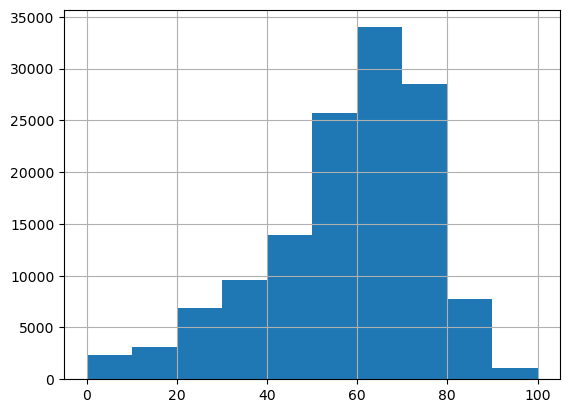

In [100]:
#57) Plot a graph to show the distrbuton of age
df_donor_details['age'].hist()
plt.show()

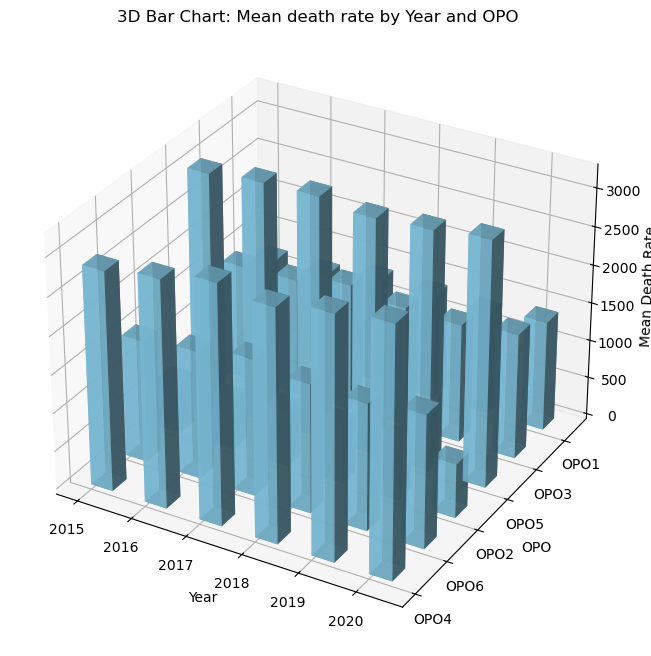

In [101]:
#58 Plot a 3-D graph using any set of random values chosen by you
#using the df_yearly_outcomes dataframe

years=df_yearly_outcomes['Year'].unique()
OPOs=df_yearly_outcomes['OPO'].unique()
mean_calc_deaths=df_yearly_outcomes.pivot(index='Year',columns='OPO',values='mean calc deaths').values

x_values=np.repeat(years, len(OPOs))
y_values=np.tile(np.arange(len(OPOs)),len(years))   #this will make it numeric
z_values=np.zeros_like(x_values)

fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')


dx=dy=0.4
dz=mean_calc_deaths.flatten()

ax.bar3d(
    x_values,
    y_values,
    z_values,
    dx, dy, dz,
    color='skyblue', alpha=0.8
)


ax.set_xlabel('Year')
ax.set_ylabel('OPO')
ax.set_zlabel('Mean Death Rate')
ax.set_title('3D Bar Chart: Mean death rate by Year and OPO')

ax.set_yticks(np.arange(len(OPOs)))
ax.set_yticklabels(OPOs)

ax.set_xticks(years)

plt.show()

In [102]:
#59) what percentage of the dataset is male vs female\n",
male_count=len(df_donor_details[df_donor_details['gender']=='M'])
male_perc=round((male_count*100/len(df_donor_details)),2)
female_count=len(df_donor_details[df_donor_details['gender']=='F'])
female_perc=round((female_count*100/len(df_donor_details)),2)
print(f"Percentage of males is {male_perc}% vs Percentage of females is {female_perc}%")
 

Percentage of males is 58.81% vs Percentage of females is 41.15%


In [103]:
#60) How many patients of each race are listed under an Unknown cause of death?
Race_cod_unknown=df_donor_details[df_donor_details['causeofdeath']=='Unknown']['race'].value_counts()
print(Race_cod_unknown)

race
White       15994
Black        4970
Hispanic     4181
Other        1635
Name: count, dtype: int64


In [104]:
#61 Display all records where approached time is more than 2 days after referral time
#filter the results where time_approached is NaT
ta_actualval=df_referral_details['time_approached'].notna()
df_val=df_referral_details[ta_actualval]
time_diff=(df_val['time_approached']-df_val['time_referred']).dt.days
time_diff_result=df_val[time_diff>2]
print(time_diff_result)

           PatientID  Approached Relatives  Authorized By Family  \
70      OPO1_P278912                     1                     1   
123     OPO1_P420462                     1                     1   
366      OPO1_P37555                     1                     1   
420     OPO1_P698255                     1                     1   
502     OPO1_P476522                     1                     1   
...              ...                   ...                   ...   
132678  OPO6_P564856                     1                     1   
132849   OPO6_P10911                     1                     1   
132930  OPO6_P332293                     1                     1   
132974  OPO6_P313521                     1                     1   
133010  OPO6_P925470                     1                     1   

        Cross_Clamped  transplanted  Tissue_Referral  Eye_Referral  \
70                  1             1                1             1   
123                 1             1        

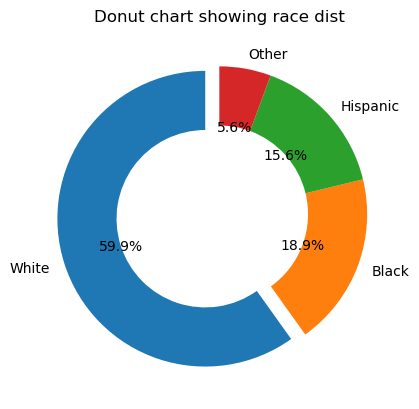

In [105]:
#62 Display a donut chart of race and explode the wedge with the maximum patients
#find the total count for each race
total_count=df_donor_details['race'].value_counts()
max_race=total_count.idxmax()
#now create explode array
explode=[0.1 if race ==max_race else 0 for race in total_count.index]

fig, ax=plt.subplots() 
wedges, texts, autotexts = ax.pie(
    total_count, 
    labels=total_count.index,
    autopct='%1.1f%%',
    explode=explode,
    startangle=90,
    wedgeprops=dict(width=0.4)
)
plt.title('Donut chart showing race dist')
plt.show()

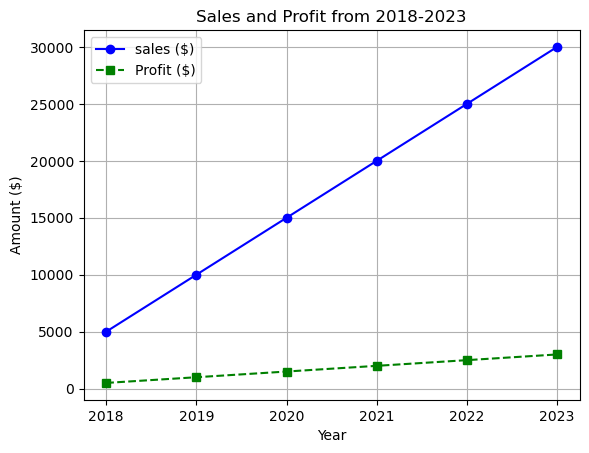

In [106]:
#63 Plot a graph multiplotting on the same canvas (take any set of x and y values)
years=[2018,2019,2020,2021,2022,2023]
sales=[5000,10000,15000,20000,25000,30000]
profit=[500,1000,1500,2000,2500,3000]

plt.plot(years,sales,label='sales ($)', color='blue', marker='o', linestyle='-')
plt.plot(years,profit,label='Profit ($)', color='green', marker='s', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.title('Sales and Profit from 2018-2023')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
#64) Replace all null values in 'Procured_year' to 1900
#created a new dataframe and did not make the change in the original one which is why inplace = true not used
replace_py=df_referral_details.fillna(1900)
print(replace_py)

           PatientID  Approached Relatives  Authorized By Family  \
0       OPO1_P320866                     0                     0   
1       OPO1_P549364                     0                     0   
2       OPO1_P536997                     1                     0   
3       OPO1_P463285                     0                     0   
4       OPO1_P284978                     0                     0   
...              ...                   ...                   ...   
133096  OPO6_P384794                     0                     0   
133097  OPO6_P902138                     0                     0   
133098    OPO6_P5461                     0                     0   
133099  OPO6_P942291                     0                     0   
133100  OPO6_P210235                     0                     0   

        Cross_Clamped  transplanted  Tissue_Referral  Eye_Referral  \
0                   0             0                1             1   
1                   0             0        

In [108]:
# Load the dataset
file_path = 'OrganDonor_Consolidated.xlsx'
df = pd.ExcelFile(file_path)
donor_details = df.parse('DonorDetails')
outcomes = df.parse('Outcomes')
referral_details = df.parse('ReferralDetails')
hosp_details = df.parse('OPO_HospDetails')
yearly_outcomes = df.parse('Yearly_Outcomes')

# Create dataset for analysis
merged_data = pd.merge(donor_details, referral_details, on='PatientID', how='outer')
merged_data = pd.merge(merged_data, outcomes, on='PatientID', how='outer')
merged_data = pd.merge(merged_data, hosp_details, on='PatientID', how='outer')

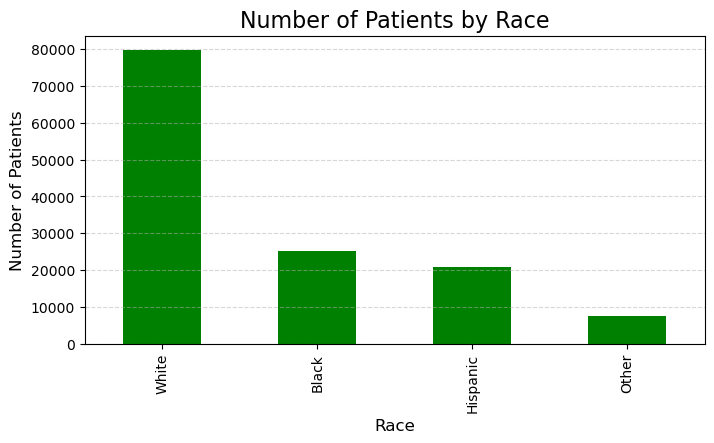

In [109]:
#Q.48 Show a bar plot of the number of patients by race?
# count the no. of patients by race
race_counts = donor_details['race'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 4))
race_counts.plot(kind='bar', color='green')

# Customize the plot
plt.title('Number of Patients by Race', fontsize=16)
plt.xlabel('Race', fontsize= 12)
plt.ylabel('Number of Patients', fontsize = 12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [110]:
#Q59. What % of the dataset is male vs female?
gender_count = donor_details['gender'].value_counts()

# Calculate % of male and female
gender_percentages = gender_count / len(donor_details) *100

print(gender_percentages)


gender
M    58.805719
F    41.148451
Name: count, dtype: float64


In [111]:
#Q60. How many patients of each race are listed under an Unknown cause of death?
# Filter the dataset for patients with an "Unknown" cause of death
unknown_cause = donor_details[donor_details['causeofdeath'] == 'Unknown']

race_counts = unknown_cause['race'].value_counts()

print(race_counts)

race
White       15994
Black        4970
Hispanic     4181
Other        1635
Name: count, dtype: int64


In [112]:
#Q65. List any 10 donors that are not there in the outcomes sheet.
# Extract donor IDs from both sheets
donor_ids = set(donor_details['PatientID'])
outcome_ids = set(outcomes['PatientID'])

# Find donors in DonorDetails but not in Outcomes
missing_donors = list(donor_ids - outcome_ids)

# Display any 10 missing donors
print(missing_donors[:10])

['OPO1_P568009', 'OPO4_P68765', 'OPO1_P734684', 'OPO4_P692024', 'OPO6_P515973', 'OPO6_P75201', 'OPO5_P130505', 'OPO2_P912919', 'OPO3_P629476', 'OPO4_P323841']


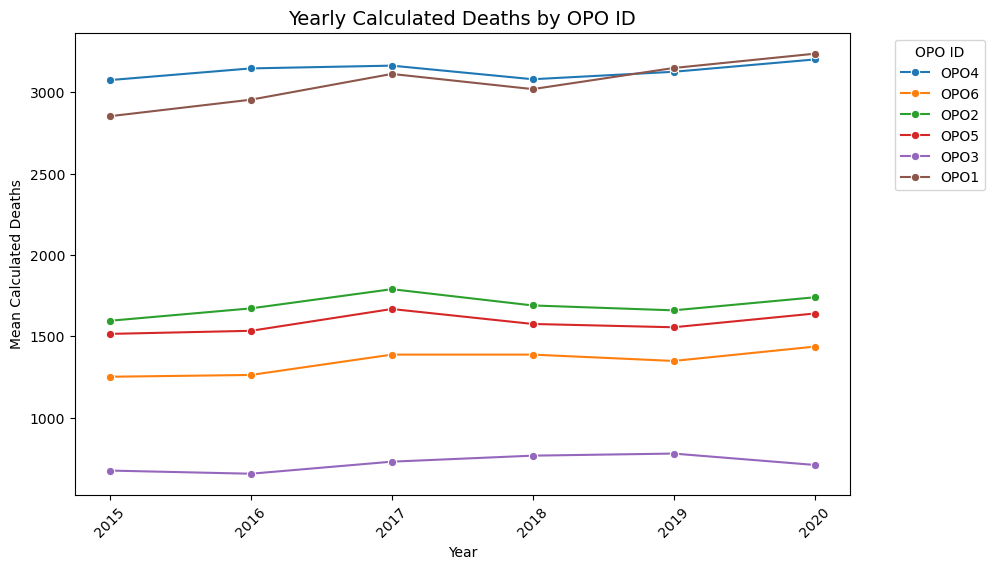

In [113]:
#Q.67 Plot a time series line graph showing yearly calculated deaths. Color each line by OPO ID

plt.figure(figsize=(10, 6))

sns.lineplot(data=yearly_outcomes, x='Year', y='mean calc deaths', hue='OPO', marker='o')

# Title and labels
plt.title('Yearly Calculated Deaths by OPO ID', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Mean Calculated Deaths', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='OPO ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [114]:
#Q.68 Create any two 2-dimensional arrays and multiply them. Display the resulting array.

# Create two 2-dimensional arrays
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[5, 6], [7, 8]])

# Multiply the arrays
result = np.dot(array1, array2)

print(result)

[[19 22]
 [43 50]]


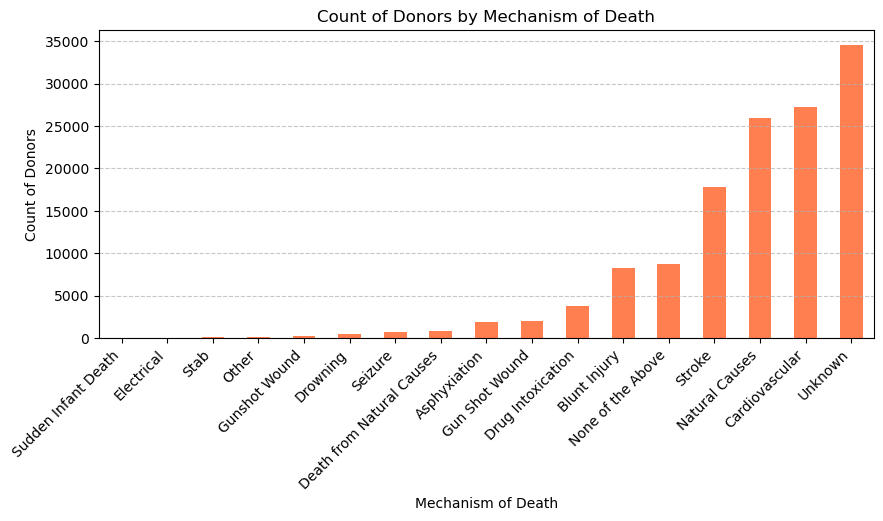

In [115]:
#Q.69 Using a bar chart, which mechnism of death had the lowest count of donors?
# Filter out "None of the above" from mechanism_of_death
df_filtered = donor_details[donor_details['mechanism_of_death'] != "None of the above"]

# Group by mechanism_of_death
mechanism_counts = df_filtered['mechanism_of_death'].value_counts()

# Sort the counts in ascending order
mechanism_counts = mechanism_counts.sort_values()

# Plot the bar chart
plt.figure(figsize=(10, 4))
mechanism_counts.plot(kind='bar', color='coral')
plt.xlabel('Mechanism of Death')
plt.ylabel('Count of Donors')
plt.title('Count of Donors by Mechanism of Death')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [116]:
#Q.70 Using arrays and loops find the number of patients who were referred in the month of July
# Convert 'time_referred' column to datetime
referral_details['time_referred'] = pd.to_datetime(referral_details['time_referred'], format='%m/%d/%y')

july_count = 0

# Use for Loop to count July no's
for date in referral_details['time_referred']:
    if date.month == 7:
        july_count += 1

# Display the result
print(july_count)

11391


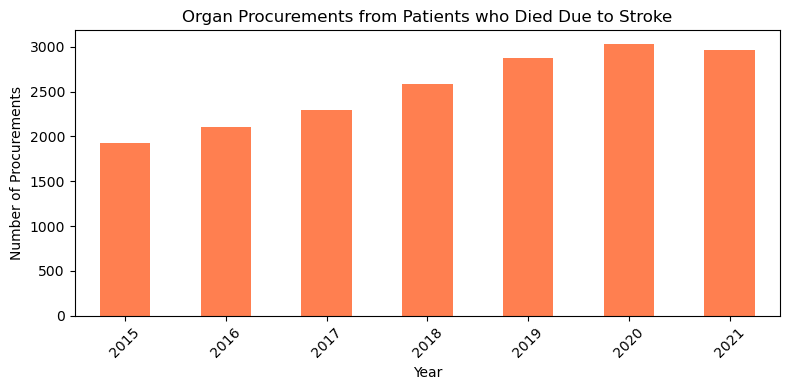

In [117]:
#Q 71. Which year recorded the highest number of organ procurements from patients who died due to stroke as the mechanism of death?
#Display this information using a bar chart.
# Filter the data for patients who died due to stroke
stroke_deaths = merged_data[merged_data['mechanism_of_death'] == 'Stroke']

# Group by year and count the number of organ procurements

yearly_procurements = stroke_deaths.groupby('Referral_Year').size()


# Plot the data as a bar chart
plt.figure(figsize=(8, 4))
yearly_procurements.plot(kind='bar', color='coral')


plt.title('Organ Procurements from Patients who Died Due to Stroke')
plt.xlabel('Year')
plt.ylabel('Number of Procurements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [118]:
#Q.72 Which organ has the highest chance of being successfully transplanted
# List of organ outcome columns
organ_columns = ['outcome_heart', 'outcome_liver', 'outcome_kidney_left', 
                 'outcome_kidney_right', 'outcome_lung_left', 
                 'outcome_lung_right', 'outcome_intestine', 'outcome_pancreas']

# Calculate the transplant success rate for each organ
success_rates = {
    organ: (merged_data[organ] == 'Transplanted').sum() / merged_data[organ].notna().sum()
    for organ in organ_columns
}

# Find the organ with the highest transplant success rate
highest_success_organ = max(success_rates, key=success_rates.get)

print(highest_success_organ)

outcome_liver


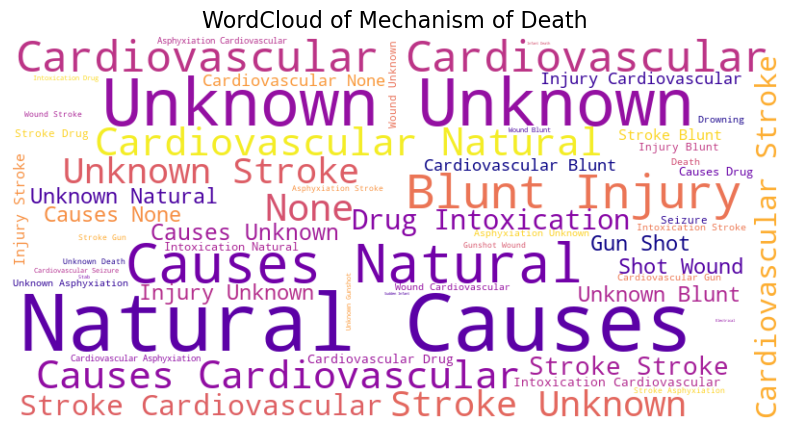

In [119]:
#Q.73 Create a WordCloud Chart with any column of your choice.
from wordcloud import WordCloud

# Generate text for the WordCloud from the column
text = ' '.join(donor_details['mechanism_of_death'])

# Create the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('WordCloud of Mechanism of Death', fontsize=16)
plt.show()


In [120]:
#Q. 74 Group donors by age into 7 groups using the binning method. Show counts under each bin
# Define the bin labels
age_bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-100']

# Define the bin
age_bins = [0, 10, 20, 30, 40, 50, 60, 100]

# Create a new column 'age_group' to categorize donors based on their age
donor_details['age_group'] = pd.cut(donor_details['age'], bins=age_bins, labels=age_bin_labels, right=False)

# Get the count of donors in each age group
age_group_counts = donor_details['age_group'].value_counts().sort_index()

# Print the counts of donors in each age group
print(age_group_counts)

age_group
0-10       2357
11-20      3091
21-30      6925
31-40      9616
41-50     13931
51-60     25742
61-100    70250
Name: count, dtype: int64


In [121]:
#Q.75 Can donors who die from cardiac arrest successfully donate their hearts for transplantation? 
#Provide data and evidence from the given dataset to support your answer.
# Filter the dataset for donors who died from cardiac arrest
cardiac_arrest_donors = merged_data[merged_data['causeofdeath'] == 'Cardiac Arrest']

# Calculate the number of cardiac arrest donors whose hearts were successfully transplanted
heart_transplanted = cardiac_arrest_donors['outcome_heart'].apply(lambda x: x == 'Transplanted').sum()

# Calculate the total number of cardiac arrest donors with valid heart outcome data
total_cardiac_arrest_donors = cardiac_arrest_donors['outcome_heart'].notna().sum()

# Print the results
print(f"Number of cardiac arrest donors: {total_cardiac_arrest_donors}")
print(f"Number of successful heart transplants: {heart_transplanted}")

Number of cardiac arrest donors: 21
Number of successful heart transplants: 14


In [122]:
#Q.76 Which organ has the highest frequency of procurement.
# List of organ outcome columns
organ_columns = ['outcome_heart', 'outcome_liver', 'outcome_kidney_left', 
                 'outcome_kidney_right', 'outcome_lung_left', 
                 'outcome_lung_right', 'outcome_intestine', 'outcome_pancreas']

# Count the number of 'Transplanted' outcomes for each organ
organ_procurement_counts = {organ: (merged_data[organ] == 'Transplanted').sum() for organ in organ_columns}

# Find the organ with the highest procurement frequency
highest_procurement_organ = max(organ_procurement_counts, key=organ_procurement_counts.get)
highest_procurement_count = organ_procurement_counts[highest_procurement_organ]

print(highest_procurement_organ)

outcome_kidney_left


In [123]:
#Q.77 Using loops, create a multiplication table for the number 8
# Multiplication table for the number 8
multiplier = 8
counter = 1

while counter <= 10:
    result = counter * multiplier
    print(f"{counter} x {multiplier} = {result}")
    counter += 1

1 x 8 = 8
2 x 8 = 16
3 x 8 = 24
4 x 8 = 32
5 x 8 = 40
6 x 8 = 48
7 x 8 = 56
8 x 8 = 64
9 x 8 = 72
10 x 8 = 80


In [124]:
#Q.78 Display random data by splitting it into 4 quartiles and labeling the quartiles.
# Generate random data
np.random.seed(0)
data = np.random.randn(100)

# Create a DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Calculate quartiles
df['Quartile'] = pd.qcut(df['Value'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Display the data with quartile labels
print(df)

       Value Quartile
0   1.764052       Q4
1   0.400157       Q3
2   0.978738       Q4
3   2.240893       Q4
4   1.867558       Q4
..       ...      ...
95  0.706573       Q3
96  0.010500       Q2
97  1.785870       Q4
98  0.126912       Q3
99  0.401989       Q3

[100 rows x 2 columns]


In [125]:
#Q.79 Display all details of the oldest female patient.
# Filter the data to include only female patients
female_patients = donor_details[donor_details['gender'] == 'F']

# Find the oldest female patient
oldest_female_patient = female_patients.loc[female_patients['age'].idxmax()]

# Details of the oldest female patient
print(oldest_female_patient)

PatientID                     OPO1_P26983
age                                 100.0
gender                                  F
race                                Black
causeofdeath                      Unknown
mechanism_of_death                Unknown
brain_death                             0
time_asystole         2037-01-09 15:00:00
time_brain_death                      NaT
age_group                             NaN
Name: 290, dtype: object


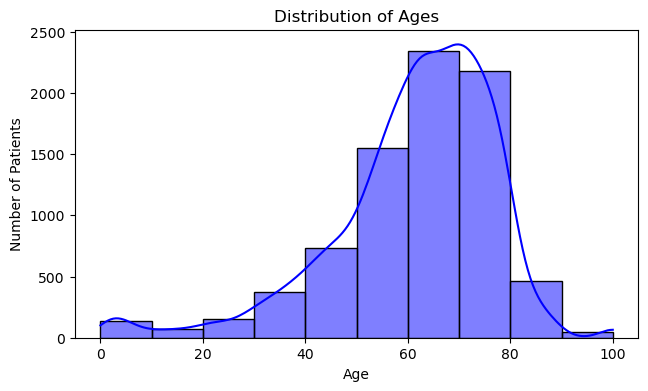

In [126]:
#Q.80 Create a point Plot on Age against Cardiac arrest.
cardiac_arrest_data = donor_details[donor_details['causeofdeath'] == 'Cardiac Arrest']
# Plotting the total number of patients
plt.figure(figsize=(16, 4))

# Histogram of ages
plt.subplot(1, 2, 1)
sns.histplot(cardiac_arrest_data['age'], bins=10, color='blue', kde=True)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Distribution of Ages')

plt.show()